In [162]:
import sympy as sp
from sympy.core.numbers import pi
from IPython.display import display
from latex2sympy2 import latex2sympy
import numpy as np
import matplotlib.pyplot as plt


In [163]:
tol = 1e-12
sp.init_printing()

Define Symbols

In [164]:
x, x1, y, y1, z, K, eps_0, y_0 = sp.symbols('x x_1 y y_1 z K epsilon_0 y_0')
a, b = sp.symbols('a b')

Create potential function for sympy

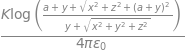

In [165]:
phi = (K/(4*pi*eps_0))*(sp.log((sp.sqrt(x**2+(y+a)**2 + z**2)+y+a)/(sp.sqrt(x**2+y**2+z**2)+y)))
display(phi)

Using mathpix, convert Janghyun's function from his powerpoint into latex, and then convert this into sympy. We are making the function two different ways to check we have it input correctly. Sympy displays equation in a not so clear way sometimes, but nothing we can do about it. 

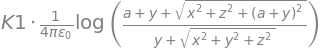

In [166]:
phi_latex = r"K\frac{1}{4 \pi \epsilon_0}\left[\ln \frac{\sqrt{x^2+(y+a)^2+z^2}+(y+a)}{\sqrt{x^2+y^2+z^2}+y}\right]"
phi_janghyun = latex2sympy(phi_latex)
display(phi_janghyun)

Check if both functions are the same, although I don't trust it so let's do another check later.

In [167]:
print(phi.equals(phi_janghyun)) 

True


Make a lambda function out of each with some simple constants so we can check equality numerically.

In [168]:
phi_simple = phi.subs({K:1, eps_0:1, pi:np.pi, a:1})
phi_janghyun_simple = phi_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})
 
phi_lambda_simple = sp.lambdify([x, y, z], phi_simple, 'numpy')
phi_janghyun_lambda_simple = sp.lambdify([x, y, z], phi_janghyun_simple, 'numpy')

Evaluate both functions at x, y, z = 2 and check equality against the tolerance.

In [169]:
x_eval, y_eval, z_eval = 2, 2, 2
print(np.abs(np.array(phi_lambda_simple(x_eval, y_eval, z_eval))-np.array(phi_janghyun_lambda_simple(x_eval, y_eval, z_eval))) < tol)

True


Differentiate our input function to find the E-Field.

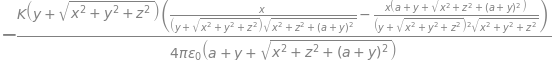

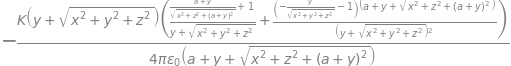

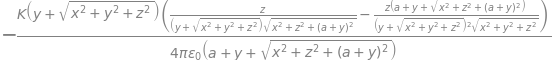

In [170]:
Ex = -1*phi.diff(x)
Ey = -1*phi.diff(y)
Ez = -1*phi.diff(z)

display(Ex, Ey, Ez)

Now convert Janghyuns's Efield math from the powerpoint into a sympy equation.

In [171]:
Ex_latex = r"$\frac{-K}{4 \pi \epsilon_0} x\left[\frac{1}{\sqrt{x^2+(y+a)^2+z^2}+(y+a)} \cdot \frac{1}{\sqrt{x^2+(y+a)^2+z^2}}-\frac{1}{\sqrt{x^2+y^2+z^2}+y} \cdot \frac{1}{\sqrt{x^2+y^2+z^2}}\right]$"
Ey_latex = r"$\frac{-K}{4 \pi \epsilon_0}\left[\frac{1}{\sqrt{x^2+(y+a)^2+z^2}+(y+a)} \cdot\left(\frac{y+a}{\sqrt{x^2+(y+a)^2+z^2}}+1\right)-\frac{1}{\sqrt{x^2+y^2+z^2}+y} \cdot\left(\frac{y}{\sqrt{x^2+y^2+z^2}}+1\right)\right]$"
Ez_latex = r"$\frac{-K}{4 \pi \epsilon_0} z\left[\frac{1}{\sqrt{x^2+(y+a)^2+z^2}+(y+a)} \cdot \frac{1}{\sqrt{x^2+(y+a)^2+z^2}}-\frac{1}{\sqrt{x^2+y^2+z^2}+y} \cdot \frac{1}{\sqrt{x^2+y^2+z^2}}\right]$"

Display Janghyun's E-field. Again sympy does not display it in such a nice way. 

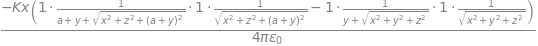

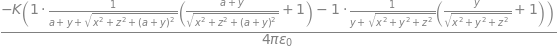

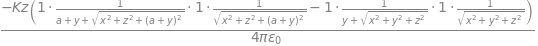

In [172]:
Ex_janghyun = latex2sympy(Ex_latex)
Ey_janghyun = latex2sympy(Ey_latex)
Ez_janghyun = latex2sympy(Ez_latex)
display(Ex_janghyun, Ey_janghyun, Ez_janghyun)

Check equation equality again with sympy:

In [173]:
print(Ex.equals(Ex_janghyun))
print(Ey.equals(Ey_janghyun))
print(Ez.equals(Ez_janghyun))

True
True
True


 and again don't trust it so do it numerically:

In [174]:
Ex_simple = Ex.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ey_simple = Ey.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ez_simple = Ez.subs({K:1, eps_0:1, pi:np.pi, a:1})

E_lambda_simple = sp.lambdify([x, y, z], [Ex_simple, Ey_simple, Ez_simple], 'numpy')

Ex_janghyun_simple = Ex_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ey_janghyun_simple = Ey_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})
Ez_janghyun_simple = Ez_janghyun.subs({K:1, eps_0:1, pi:np.pi, a:1})

E_janghyun_lambda_simple = sp.lambdify([x, y, z], [Ex_janghyun_simple, Ey_janghyun_simple, Ez_janghyun_simple], 'numpy')

print(np.abs(np.array(E_lambda_simple(x_eval, y_eval, z_eval))-np.array(E_janghyun_lambda_simple(x_eval, y_eval, z_eval))) < tol)

[ True  True  True]


Ok, so now we probably have the wire potential implemented correctly, let's plot the potential to view it.

In [175]:
x_line = np.linspace(-1, 1, 1000)
y_line = np.linspace(-1, 1, 1000)
x_grid, y_grid = np.meshgrid(x_line, y_line)

Text(0, 0.5, 'y')

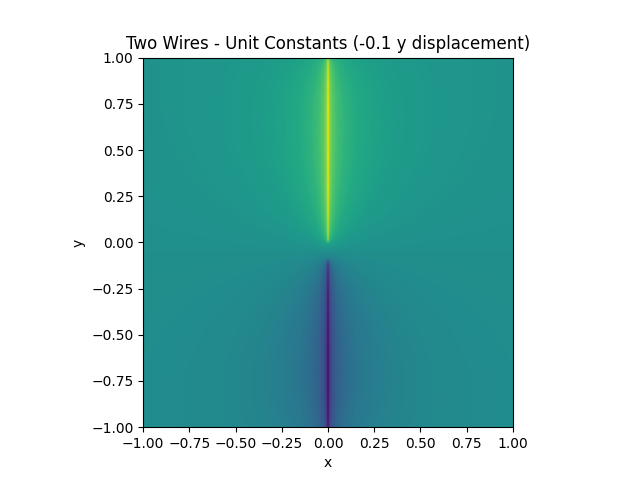

In [176]:
plt.figure()
plt.imshow(phi_lambda_simple(x_grid, y_grid, 0)-phi_lambda_simple(-(x_grid-0), -(y_grid-0.1), 0), extent = [-1, 1, -1, 1])
plt.title('Two Wires - Unit Constants (-0.1 y displacement)')
plt.xlabel('x')
plt.ylabel('y')

Now we need to make a function that creates our wire potential and E-Field for specific parameters. Here we use a slightly modified version of the potential from principles of electron optics Vol. 1, as Hawkes way should account for relativistic effects without the need to update the gamma factor explicitly. See chapter 2, relativistic kinematics for more information from Vol 1, 2017 edition of principles of electron optics.. 

$\hat{\Phi}\left(\boldsymbol{r}, \Phi_0\right)=\left(\Phi_0+\Phi(\boldsymbol{r})\right)\left\{1+\varepsilon\left(\Phi_0+\Phi(\boldsymbol{r})\right)\right\} \geq 0$ (Equation 2.18)

where $\hat{\Phi}\left(\boldsymbol{r}\right)$ is our potential function, $\Phi_0$ is a function that describes the distribution of electron energies from the gun (we set this to zero because we aren't accounting for chromatic aberration now), and $\varepsilon:=\frac{e}{2 m_0 c^2}=0.9785 \mathrm{MV}^{-1}$ (Equation 2.16).

With this definition, we can also define $\gamma$ in terms of the potential: $\gamma=\sqrt{1+4 \varepsilon \hat{\Phi}}=1+2 \varepsilon\left\{\Phi(\mathbf{r})+\Phi_0\right\}$ (Equation 2.21).

When Hawkes derives the electron equations of motion (Equation 3.22), using 2.18 as his potential, updates to $\gamma$ are implicitly included in changes to the potential by writing our potential as $\hat{\Phi}$. 

$\begin{aligned} x^{\prime \prime} & =\frac{\rho^2}{2 \hat{\Phi}}\left(\frac{\partial \hat{\Phi}}{\partial x}-x^{\prime} \frac{\partial \hat{\Phi}}{\partial z}\right) \\ y^{\prime \prime} & =\frac{\rho^2}{2 \hat{\Phi}}\left(\frac{\partial \hat{\Phi}}{\partial y}-y^{\prime} \frac{\partial \hat{\Phi}}{\partial z}\right)\end{aligned}$

Solving this numerically should automatically give us relativistic electron trajectories, where the electron's energy, velocity and wavelength update correctly as it sees the potential from the wires. 

TEMGYMAdvanced previously did not implement this, as I wasn't quite aware of this method until I started to look at this again last week. 

Create function to make the wire potential. 

In [177]:
def make_double_wire_potential_and_efield(phi, phi_0, x, y, z, K, eps_0, eps, a,
                                          x_displacement, y_displacement, K_val,
                                          eps_0_val, length):
    
    #Substitute correct constants into the wire potential
    phi = phi.subs({K: K_val, eps_0: eps_0_val, pi: np.pi, a: length})
    
    #Create the top and bottom wire
    phi_top_wire = phi
    phi_bottom_wire = phi.subs({x:-(x-x_displacement), y:-(y-y_displacement)})

    #Make the first wire positively charged, and the second negatively charged
    phi_wires = phi_top_wire - phi_bottom_wire
    
    #Include the initial potential of the electron from the gun. 
    phi_wires_electron = phi_0 - phi_wires
    
    #Create phi_hat function from hawkes (2.18)
    phi_hat = (phi_wires_electron)*(1+eps*(phi_wires_electron))
    
    #Get E field function. Notive there is no negative sign, as the way hawkes uses phi_hat, there is no minus before it (Equation 3.22).
    dphi_hat_dx = phi_hat.diff(x)
    dphi_hat_dy = phi_hat.diff(y)
    dphi_hat_dz = phi_hat.diff(z)
    
    phi_wires_lambda = sp.lambdify([x, y, z], phi_wires, 'numpy')
    phi_hat_lambda = sp.lambdify([x, y, z], phi_hat, 'numpy')
    dphi_hat_lambda = sp.lambdify([x, y, z], [dphi_hat_dx, dphi_hat_dy, dphi_hat_dz], 'numpy')
    
    return phi_hat_lambda, dphi_hat_lambda, phi_wires_lambda

Define some important constants such as the initial potential, velocity gamma factor.

In [178]:
e = -1.60217662e-19 #unit C
m = 9.10938356e-31 #unit kg
c = 2.99792458e8 #unit m/s
eps_0_val = 8.85418782e-12 #permittivity unit F/m

phi_0 = 2e5 #unit V
v_0 = c*(1-(1-(e*phi_0)/(m*(c**2)))**(-2))**(1/2) #unit m/s
eta = (abs(e)/(2*m))**(1/2) #Constant from Hawkes
gamma = 1/(1-(v_0**2/c**2))**(1/2) #Gamma factor
eps = abs(e)/(2*m*c**2) #eps as defined in Hawkes, different from the permittivity of free space. 

Let's check that the relativistic velocity of the electron as defined by Hawkes matches v_0 above (the usual way to calculate relativistic velocity).

In [179]:
phi_hat = (phi_0)*(1+eps*(phi_0)) 
v_0_hawkes = 2*eta*(phi_hat/(1+4*eps*phi_hat))**(1/2)

print(v_0)
print(v_0_hawkes)

208450034.84900752
208450034.84900752


Let's check visually that the function we have created makes the same potential as what we created above.

In [180]:
phi_lambda, dphi_lambda, phi_wires_lambda = make_double_wire_potential_and_efield(phi, phi_0, x, y, z, K, eps_0, eps, a, 0, 0.1, 1, 1, 1)

Text(0, 0.5, 'y')

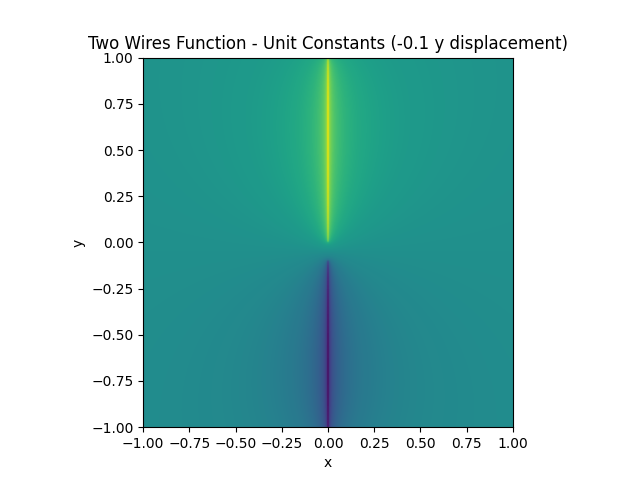

In [181]:
plt.figure()
plt.imshow(phi_wires_lambda(x_grid, y_grid, 0), extent = [-1, 1, -1, 1])
plt.title('Two Wires Function - Unit Constants (-0.1 y displacement)')
plt.xlabel('x')
plt.ylabel('y')

Create the actual potential as per the constants sent by Janghyun. I presume I should convert K to SI units? 

In [182]:
K_val = 3.31 #unit e/nm - convert to coulombs per m? 
K_val_SI = (3.31*abs(e))/1e-9 #C/m
y_displacement = 177e-9 #unit m
x_displacement = 10e-9 #unit m
a_val = 1e-3 #unit m

phi_hat_lambda, dphi_hat_lambda, phi_wires_lambda = make_double_wire_potential_and_efield(phi, phi_0, x, y, z, K, eps_0, eps, a, x_displacement, y_displacement, 
                                                                        K_val_SI, eps_0_val, a_val)

Plot the potential from plan view (view of x, y plane), and side view (view of (z, y plane))

Text(0, 0.5, 'y (m)')

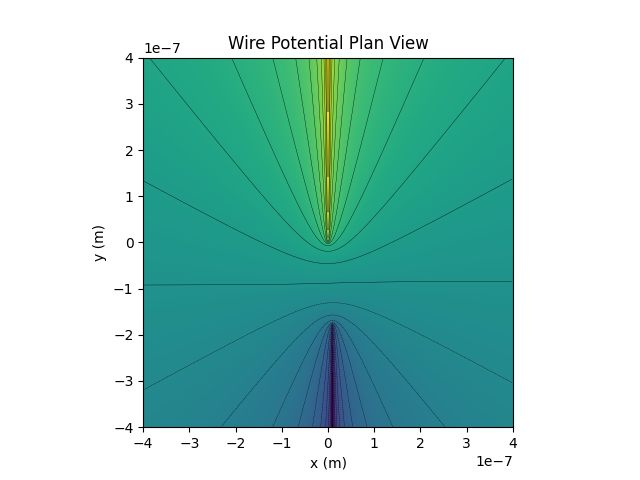

In [183]:
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image = phi_wires_lambda(x_grid, y_grid, 0)
plan_ax.imshow(potential_image, extent=[-400e-9, 400e-9, -400e-9, 400e-9])
plan_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent = [-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')
plan_ax.set_title('Wire Potential Plan View')
plan_ax.set_xlabel('x (m)')
plan_ax.set_ylabel('y (m)')

Plot sideview (I think this is correct, it should look the same as the plan view)

Text(0, 0.5, 'y (m)')

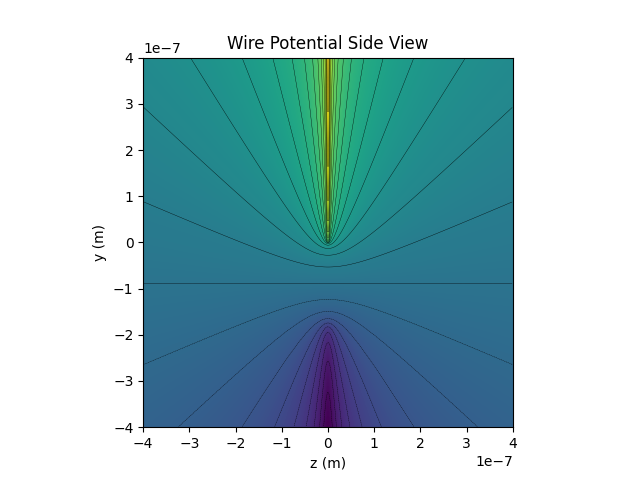

In [184]:
zy_figure, zy_ax = plt.subplots()
z_line, zstep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_grid, z_grid = np.meshgrid(y_line, z_line)
x_grid = 0*np.ones(y_grid.shape)
potential_image = phi_wires_lambda(x_grid, z_grid, y_grid)
zy_ax.imshow(potential_image, extent=[-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')
zy_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent=[-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')

zy_ax.set_title('Wire Potential Side View')
zy_ax.set_xlabel('z (m)')
zy_ax.set_ylabel('y (m)')

Dormand prince 5/4 adaptive step size ODE solver

In [185]:
def odedopri(f,  x0,  y0,  x1,  tol,  hmax,  hmin,  maxiter, args=()):
    a21 = (1.0/5.0)
    a31 = (3.0/40.0)
    a32 = (9.0/40.0)
    a41 = (44.0/45.0)
    a42 = (-56.0/15.0)
    a43 = (32.0/9.0)
    a51 = (19372.0/6561.0)
    a52 = (-25360.0/2187.0)
    a53 = (64448.0/6561.0)
    a54 = (-212.0/729.0)
    a61 = (9017.0/3168.0)
    a62 = (-355.0/33.0)
    a63 = (46732.0/5247.0)
    a64 = (49.0/176.0)
    a65 = (-5103.0/18656.0)
    a71 = (35.0/384.0)
    a72 = (0.0)
    a73 = (500.0/1113.0)
    a74 = (125.0/192.0)
    a75 = (-2187.0/6784.0)
    a76 = (11.0/84.0)
    c2 = (1.0 / 5.0)
    c3 = (3.0 / 10.0)
    c4 = (4.0 / 5.0)
    c5 = (8.0 / 9.0)
    c6 = (1.0)
    c7 = (1.0)
    b1 = (35.0/384.0)
    b2 = (0.0)
    b3 = (500.0/1113.0)
    b4 = (125.0/192.0)
    b5 = (-2187.0/6784.0)
    b6 = (11.0/84.0)
    b7 = (0.0)
    b1p = (5179.0/57600.0)
    b2p = (0.0)
    b3p = (7571.0/16695.0)
    b4p = (393.0/640.0)
    b5p = (-92097.0/339200.0)
    b6p = (187.0/2100.0)
    b7p = (1.0/40.0)
    x = x0
    y = y0
    h = hmax
    X = np.zeros(maxiter)
    X[0] = x0
    Y = np.zeros((maxiter, len(y0)))
    Y[0] = y0
    
    #We need a special step counter because the ODE dormand prince 
    #method will do a step again with a smaller step size if the error is too large
    step = 1
    for i in range(maxiter):
       # /* Compute the function values */
       K1 = f(x,       y, *args)
       K2 = f(x + c2*h, y+h*(a21*K1), *args)
       K3 = f(x + c3*h, y+h*(a31*K1+a32*K2), *args)
       K4 = f(x + c4*h, y+h*(a41*K1+a42*K2+a43*K3), *args)
       K5 = f(x + c5*h, y+h*(a51*K1+a52*K2+a53*K3+a54*K4), *args)
       K6 = f(x + h, y+h*(a61*K1+a62*K2+a63*K3+a64*K4+a65*K5), *args)
       K7 = f(x + h, y+h*(a71*K1+a72*K2+a73*K3+a74*K4+a75*K5+a76*K6), *args)
       error = abs((b1-b1p)*K1+(b3-b3p)*K3+(b4-b4p)*K4+(b5-b5p)*K5 +
                   (b6-b6p)*K6+(b7-b7p)*K7)
       #Error in X controls tolerance
       error = max(error)
       # error control
       if error != 0.0:
           delta = 0.84 * pow(tol / error, (1.0/5.0))
       else:
           delta = np.inf
       if (error < tol):
          x = x + h
          X[step] = x
          y = y + h * (b1*K1+b3*K3+b4*K4+b5*K5+b6*K6)
          Y[step, :] = y
          step+=1
       if (delta <= 0.1):
          h = h * 0.1
       elif (delta >= 4.0):
          h = h * 4.0
       else:
          h = delta * h
       if (h > hmax):
          h = hmax
       if (x >= x1):
          print('reached end')
          break
       elif (x + h > x1):
          h = x1 - x
       elif (h < hmin):
          print('Below hmin')
          break
    return X, Y, step

Create the equation of motion ODE to solve

In [186]:
def trajectory_equation_of_motion(z, x, phi_hat_lambda, dphi_hat_lambda):
    
    p = np.sqrt(1+x[1]**2+x[3]**2) #obtain slope of ray
    phi_hat = phi_hat_lambda(x[0], x[2], z) #evaluate potential
    dphi_hat_x, dphi_hat_y, dphi_hat_z = dphi_hat_lambda(x[0], x[2], z) #evaluate the efield
    
    return np.array([x[1], (p**2)/(2*phi_hat)*(dphi_hat_x-x[1]*dphi_hat_z), x[3], (p**2)/(2*phi_hat)*(dphi_hat_y-x[3]*dphi_hat_z)]) #evaluate the velocities and accelerations, [vx, ax, vy, ay]

Set up initial conditions for ray tracing

In [187]:
x0 = np.array([5e-9, 0, -y_displacement/2, 0]) #x, x', y, y'
z0 = -1e-6 #Initial z plane
zF = 1e-6 #Final z plane

Trace the electron through the potential

In [188]:
z_out, x_out, steps = odedopri(trajectory_equation_of_motion,  z0,  x0,  zF,  1e-5,  1e-7,  1e-15,  10000, args=(phi_hat_lambda, dphi_hat_lambda))

reached end


Plot the y coordinate, while there is not almost no potential at the start the ode solver takes larger steps, then as the field increases in value, the step size decreases until the required accuracy is found.

X positional deflection: 8.582354159327897e-11
Y positional deflection: 1.4290352782243566e-10


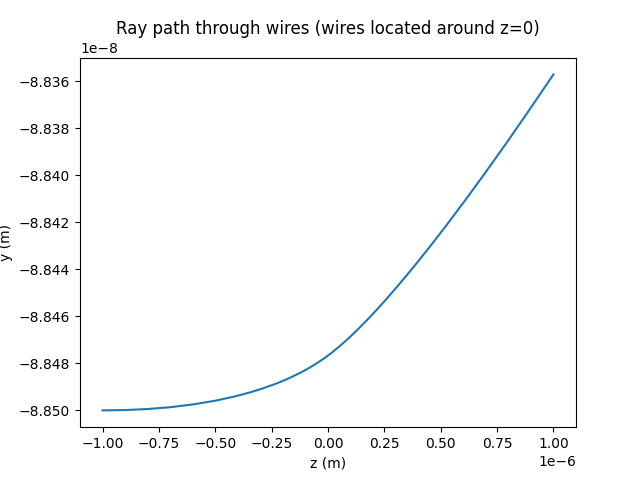

In [189]:
plt.figure()
plt.plot(z_out[:steps], x_out[:steps, 2])
plt.title('Ray path through wires (wires located around z=0)')
plt.xlabel('z (m)')
plt.ylabel('y (m)')

print('X positional deflection:', abs(x_out[0, 0]-x_out[steps-1, 0]))
print('Y positional deflection:', abs(x_out[0, 2]-x_out[steps-1, 2]))

Make a 3D plot with the electron starting at the top and moving downwards (not so visually intuitive right now)

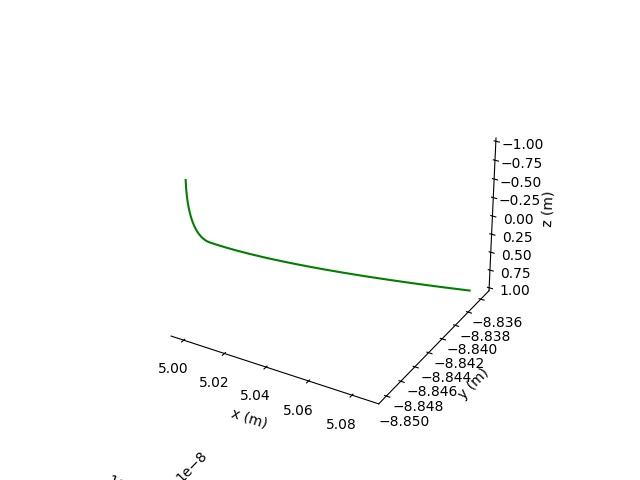

In [190]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.invert_zaxis()

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.plot(x_out[:steps, 0], x_out[:steps, 2], z_out[:steps], color =  'g')

Plot the deflection of the electron as seen from plan view. I think the deflection direction is correct, because the electron is negatively charged, and in my model the top wire is positively charged, so the electron should move in the direction of the top wire.

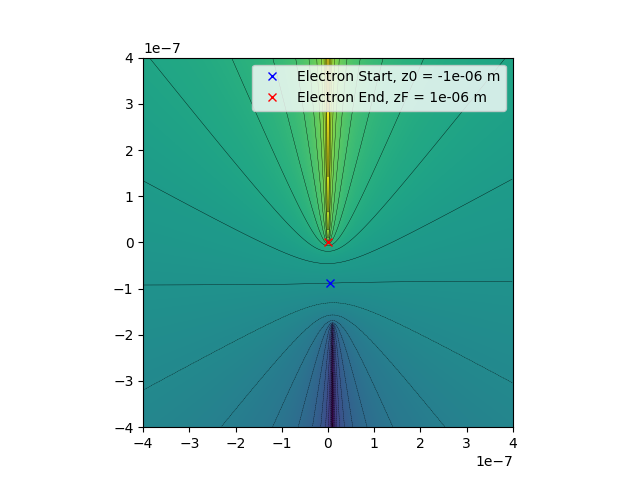

In [191]:
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image = phi_wires_lambda(x_grid, y_grid, 0)
plan_ax.imshow(potential_image, extent=[-400e-9, 400e-9, -400e-9, 400e-9])
plan_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent = [-400e-9, 400e-9, -400e-9, 400e-9], origin = 'upper')
plan_ax.plot(x_out[0, 0], x_out[0, 2], 'xb', label = f'Electron Start, z0 = {z0} m')
plan_ax.plot(x_out[steps, 0], x_out[steps, 2], 'xr', label = f'Electron End, zF = {zF} m')
plan_ax.legend()

Plot side view (again hard to visualise what's happening with the electron and the wire at the same time)

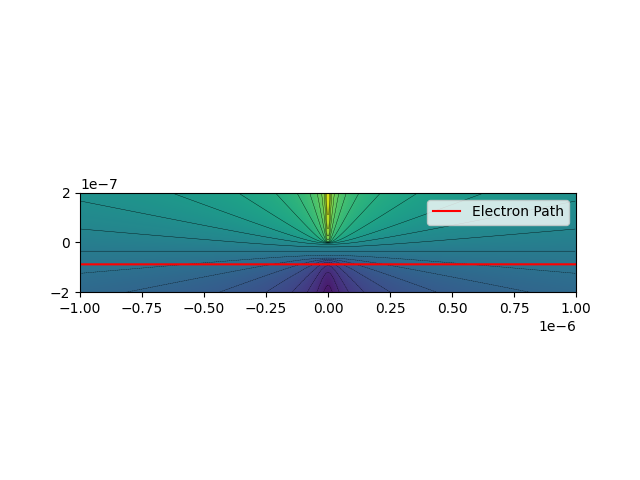

In [192]:
zy_figure, zy_ax = plt.subplots()
z_line, zstep = np.linspace(-1000e-9, 1000e-9, 300, retstep = True)
y_line, ystep = np.linspace(-400e-9, 400e-9, 300, retstep = True)
y_grid, z_grid = np.meshgrid(y_line, z_line)
x_grid = 0*np.ones(y_grid.shape)
potential_image = phi_wires_lambda(x_grid, z_grid, y_grid)
zy_ax.imshow(potential_image, extent=[-1000e-9, 1000e-9, -400e-9, 400e-9], origin = 'upper')
zy_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent=[-1000e-9, 1000e-9, -400e-9, 400e-9], origin = 'upper')

zy_ax.plot(z_out[:steps], x_out[:steps, 2], '-r', label = 'Electron Path')
zy_ax.set_xlim(-1000e-9, 1000e-9)
zy_ax.set_ylim(-200e-9, 200e-9)
zy_ax.legend()

What's next? I think we need to check that this code I have written is correct, and that it matches Janghyun's result. There could easily be an incorrect sign somewhere, but it shouldn't be too hard to compare and find out. I will add a plots of the axial potential and axial electric field soon also, to compare with Janghyun. With some more alignment of parameters (starting and end electron plane in z etc.), we should be able to compare the deflection amount between multislice and ray tracing, and from there we can perhaps measure projected potential with ray tracing also. 

I think it's possible for me to calculate the phase difference of the electron at the "final plane" using optical path length integral calculation. I will work on this next. From here it might be possible to measure aberrations if we build up enough data via fitting of the phase image with a suitable basis (No idea if this is possible or if it even makes sense, I've never seen it done before). It should at least be possible to build up enough rays to trace a "phase image" (assuming the Optical path lenght calculation works) with a parallelised code.

I have looked into some analytical ways to calculate the aberration integrals of this wire setup, but I don't think I can do it easily. I think I know why the Differential algebra method won't work on exotic potentials for me: It is absolutely neccessary to break the potential down into a power series expansion. I think this because every method of deriving aberration integrals, or calculating aberrations that I know of successively adds more terms of a series expansion to obtain higher order aberrations. One can't just trace rays through an arbitrary potential and obtain aberration coefficients using the DA method. One method that can find aberrations in an arbitrary potential is to trace rays, and fit a polynomial to the ray deviation in the image plane. I have not implemented this yet but it could be an option here to try. 

I do know it is possible to get aberrations analytically for this system, I just don't think anyone has published a method: What it boils down to is firstly understanding the symmetries of the system, so one can write the correct series expansion of the potential along some symmetry plane (See Page 95 of Hawkes principles of electron optics, 7.4 Multipole Fields). From here, one will obtain an expression with a series of axial potential functions, which are non-trivial to obtain. The only paper I know of which shows how to obtain the axial potential functions is here: https://pubs.aip.org/aip/rsi/article-abstract/68/12/4409/347350/Analytical-and-numerical-computation-of-multipole?redirectedFrom=fulltext for a magnetic deflector system. Lencova obtains the axial potential functions of a magnetic deflector system using maple. I think for this wire setup, it has to be possible to do this, and it must have dipole symmetry when the two wires are exactly opposite each other, so that is already a good start. 

Basically to calculate aberration coefficients for this system I think one needs to; 

step 1: Write the potential function (which we have already)
step 2: Obtain the taylor expansion of this potential using Maple
step 3: Seperate in each term the fourier components with respect to the polar angle $\theta$.
step 4: From here it's unclear, but having the series expansion then allows me to try the Differential Algebra method or otherwise. 

For now though, I think a numerical method such as measuring the phase difference and fitting a polynomial basis is more likely to succeed, if not only for the fact that it is somewhat novel. 

